# As part of this data analysis I am considering sales_train.csv  and test.CSV to predict future sales of each ID(product and shop tuple )

The data sets considered for this analyis and there description as as follows:

The train data set consists of  historical sales data  from January 2013 to October 2015.
This data set was provided by one of the largest Russian software firms

sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
sample_submission.csv - a sample submission file in the correct format.
items.csv - supplemental information about the items/products.
item_categories.csv - supplemental information about the items categories.
shops.csv- supplemental information about the shops.

# Data fields
ID - an Id that represents a (Shop, Item) tuple within the test set
shop_id - unique identifier of a shop
item_id - unique identifier of a product
item_category_id - unique identifier of item category
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
item_price - current price of an item
date - date in format dd/mm/yyyy
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
item_name - name of item
shop_name - name of shop
item_category_name - name of item category


# Problem statement :  The task is to forecast the total amount of products sold in every shop for the test set.

# Understaning the data and points to note :

As this data set is purely based on the historical sales data we can consider this as a pure observational study with random sampling and without  random assignment. 
This data set being an observational study we can establish an association based on the observations made.
we can establish correlation between explanatory and response variables and the results can be generalizable. 
We cannot make any causal conclusions.



In [1]:
# set working directory and clear objects 
rm(list=ls()) ; gc()    # Delete objects and garbage clearance
library(dplyr)          # For data manipulation
library(magrittr)       # For pipes
library(lattice)
library(lubridate)			# For date manipulation
library(padr)           # For aggregating data quarter/month wise: thicken()
library(ggplot2) 
library(funModeling)
library(padr)
library(forecast)
library(data.table)


setwd("C:\\Users\\vikandul\\Desktop\\BIG DATA - FORE SCHOOL COURSE\\Class Notes and Supporting documentation\\Week_05252018\\Kaggle Excercise")



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,485244,26.0,940480,50.3,750400,40.1
Vcells,852549,6.6,1650153,12.6,1023674,7.9



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: Hmisc
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

funModeling v.1.6.7 :)
Examples and tutorials at livebook.datascienceheroes.com


Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last



In [2]:
library(dplyr)          # For data manipulation
library(magrittr)       # For pipes
library(lubridate)			# For date manipulation
library(padr)           # For aggregating data quarter/month wise: thicken()
library(ggplot2) 

# Import and understand the data  :

Import train_sales.CSV file to data frame train_sales_data 
the train_sales_data have 2935849 rows/ observations with 6 attributes / columns



In [3]:
train_sales_data<- read.csv("sales_train_v2.csv", header =TRUE)

dim(train_sales_data)

[1] 2935849       6

Validate train_sales_data and identify for null / NA values , check count of unique values for each attribute of train data set.

date is a factor variable and consists of 1034 unique values
date_block_num is an integer variable with 34 unique values and consists of 115690 rows with value as 0
shop_id is an integer variable with 60 unique values and consists of 9857 rows with a value of 0 
item_id is an integer variable with 21807 unique values and consits of 1 row with a value of 0 
item_price is a numeric value with 10003 unique values 
item_cnt_day is a numeric variable with 198 unique values 



In [4]:
check_na <- df_status(train_sales_data)
#or
sum(is.na(train_sales_data))


        variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1           date       0    0.00    0    0     0     0  factor   1034
2 date_block_num  115690    3.94    0    0     0     0 integer     34
3        shop_id    9857    0.34    0    0     0     0 integer     60
4        item_id       1    0.00    0    0     0     0 integer  21807
5     item_price       0    0.00    0    0     0     0 numeric  19993
6   item_cnt_day       0    0.00    0    0     0     0 numeric    198


[1] 0

# Derive summary of the train_sales_data using summary function :

summary will help us determine the following for each attribute :
For Integer / numeric variables :
    It will help us derive the minimum , maximum , mean, median , Ist quartile, 3rd Quartile values

For Factor variables :
    It will derive count of observations for each level of the factor variable and results will be displayed in descending order of count of observations. 
For example : 28.12.2013 date have 9493 observations which is the max count for any day in the train_sales_data set.


In [5]:
summary(train_sales_data)

         date         date_block_num     shop_id      item_id     
 28.12.2013:   9434   Min.   : 0.00   Min.   : 0   Min.   :    0  
 29.12.2013:   9335   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 30.12.2014:   9324   Median :14.00   Median :31   Median : 9343  
 30.12.2013:   9138   Mean   :14.57   Mean   :33   Mean   :10197  
 31.12.2014:   8347   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 27.12.2014:   8041   Max.   :33.00   Max.   :59   Max.   :22169  
 (Other)   :2882230                                               
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  
                                      

# We have another data file test.csv with 3 columns as listed below : 
ID   - represents a ( Shop,item ) tuple
shop_id - unique identifier to identify a Shop
item_id  - unique identifier to identify an item 

lets import test file to train_test_set data frame.

The train_test_set consists of 214200 observations with 2 attributes.

In [6]:
train_test_set<- read.csv("test.csv", header =TRUE)

dim(train_test_set)

[1] 214200      3

# Data Transformation


 In order to forcast products sales for shops which are available in test set data frame lets join train_sales_data file with train_test_set using a Left Join.
  
 test.csv set consists of ID Attribute which represents a (Shop, Item) tuple within the test set and 
we need to append this information to train_sales_data using left join. 
lets create a new data frame train_sales_test_set to store left join data. 

Data frame train_sales_test_set is created with 2935849 observations which is same as train_sales data and 8 columns / attributes(One new attribute ID is added ).


In [7]:
 train_sales_test_set<- left_join(train_sales_data, train_test_set, by= c('shop_id', 'item_id'))

dim(train_sales_test_set)

[1] 2935849       7


Identify for null /NA values if any in train_sales_test_set
we can see that ID attribute have 58.29% of observations with NULL values hence we should delete these observations as we need to predict sales for each (Shop, Item) tuple  existing in the test data set.


In [8]:

df_status(train_sales_test_set)

# check for missing values in the data frame
any(is.na(train_sales_test_set[]))
# derive sum of missing values in the data frame
sum(is.na(train_sales_test_set))
# derive column wise count of missing values in data frame
colSums(is.na(train_sales_test_set))
# delete observations with missing values from data frame
train_sales_test_set<- na.omit(train_sales_test_set)
# derive dimensions of the data frame after deleting missing observations
dim(train_sales_test_set)
# recheck for missing values if any in the data frame
sum(is.na(train_sales_test_set))
# recheck for missing values in each column
colSums(is.na(train_sales_test_set))
df_status(train_sales_test_set)


        variable q_zeros p_zeros    q_na  p_na q_inf p_inf    type unique
1           date       0    0.00       0  0.00     0     0  factor   1034
2 date_block_num  115690    3.94       0  0.00     0     0 integer     34
3        shop_id    9857    0.34       0  0.00     0     0 integer     60
4        item_id       1    0.00       0  0.00     0     0 integer  21807
5     item_price       0    0.00       0  0.00     0     0 numeric  19993
6   item_cnt_day       0    0.00       0  0.00     0     0 numeric    198
7             ID      13    0.00 1711410 58.29     0     0 integer 111404


[1] TRUE

[1] 1711410

date date_block_num        shop_id        item_id     item_price 
             0              0              0              0              0 
  item_cnt_day             ID 
             0        1711410

[1] 1224439       7

[1] 0

date date_block_num        shop_id        item_id     item_price 
             0              0              0              0              0 
  item_cnt_day             ID 
             0              0

        variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1           date       0    0.00    0    0     0     0  factor   1034
2 date_block_num   17310    1.41    0    0     0     0 integer     34
3        shop_id       0    0.00    0    0     0     0 integer     42
4        item_id       0    0.00    0    0     0     0 integer   4716
5     item_price       0    0.00    0    0     0     0 numeric  11941
6   item_cnt_day       0    0.00    0    0     0     0 numeric    162
7             ID      13    0.00    0    0     0     0 integer 111404



In order to predict sales we need to build a time series graph. 
The date field of train_sales_data is a factor variable and we need to convert this column into date type. 

In [9]:
train_sales_test_set$date <- dmy(train_sales_test_set$date)
class(train_sales_test_set$date)
head(train_sales_test_set)

[1] "Date"

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
1,2013-01-02,0,59,22154,999,1,150983
11,2013-01-03,0,25,2574,399,2,56520
12,2013-01-05,0,25,2574,399,1,56520
13,2013-01-07,0,25,2574,399,1,56520
14,2013-01-08,0,25,2574,399,2,56520
15,2013-01-10,0,25,2574,399,1,56520


Create a New variable date-Quarter to group observations by fiscal quarter

In [10]:
train_sales_test_set <- train_sales_test_set %>% thicken('quarter')




Warning message:
"Datetime variable was unsorted, result will be unsorted as well."

Create a New variable date_month to group observations by calender month

In [11]:
train_sales_test_set <- train_sales_test_set %>% thicken('month', by = 'date')



Warning message:
"Datetime variable was unsorted, result will be unsorted as well."

In [12]:
df_status(train_sales_test_set)

        variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1           date       0    0.00    0    0     0     0    Date   1034
2 date_block_num   17310    1.41    0    0     0     0 integer     34
3        shop_id       0    0.00    0    0     0     0 integer     42
4        item_id       0    0.00    0    0     0     0 integer   4716
5     item_price       0    0.00    0    0     0     0 numeric  11941
6   item_cnt_day       0    0.00    0    0     0     0 numeric    162
7             ID      13    0.00    0    0     0     0 integer 111404
8   date_quarter       0    0.00    0    0     0     0    Date     12
9     date_month       0    0.00    0    0     0     0    Date     34


In [13]:
head(train_sales_test_set)

date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,date_quarter,date_month
2013-01-02,0,59,22154,999,1,150983,2013-01-01,2013-01-01
2013-01-03,0,25,2574,399,2,56520,2013-01-01,2013-01-01
2013-01-05,0,25,2574,399,1,56520,2013-01-01,2013-01-01
2013-01-07,0,25,2574,399,1,56520,2013-01-01,2013-01-01
2013-01-08,0,25,2574,399,2,56520,2013-01-01,2013-01-01
2013-01-10,0,25,2574,399,1,56520,2013-01-01,2013-01-01


item_cnt_day attribute have some negative values and in order to calculate average sales by item_cnt_day attribute we need to remove observations with negative item_cnt_day.
lets create a new data frame and store final data set to train_sales_model_data


In [14]:
train_sales_model_data <-train_sales_test_set[as.numeric(as.character(train_sales_test_set$item_cnt_day)) > 0,]
df_status(train_sales_model_data)

        variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1           date       0    0.00    0    0     0     0    Date   1034
2 date_block_num   17253    1.41    0    0     0     0 integer     34
3        shop_id       0    0.00    0    0     0     0 integer     42
4        item_id       0    0.00    0    0     0     0 integer   4716
5     item_price       0    0.00    0    0     0     0 numeric  11935
6   item_cnt_day       0    0.00    0    0     0     0 numeric    155
7             ID      13    0.00    0    0     0     0 integer 111404
8   date_quarter       0    0.00    0    0     0     0    Date     12
9     date_month       0    0.00    0    0     0     0    Date     34


In [15]:
#Derive total items sold per shop id on a monthly basis 
shop_monthly_sales<- train_sales_model_data%>% group_by(shop_id, date_month)%>% 
  summarise(items_sold = sum(item_cnt_day))%>% ungroup()%>% arrange(date_month)

In [16]:
# to predict sales we need to convert data into time series. I am using ts function to convert items_sold into time series data.
# additional parameters passed to ts function are as follows.
# time duration to be considered for time series object will be between start and end time frame provided 
# time range provided is from Jan 2013 to Oct 2015 and frequency =12 is to determine the interval and here the interval is monthly.
ts_mon_sales<- ts(shop_monthly_sales$items_sold, start =c(2013,1), end =c(2015,10), frequency= 12)



Series: ts_mon_sales 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
          mean
      611.9706
s.e.   74.4248

sigma^2 estimated as 194034:  log likelihood=-254.72
AIC=513.45   AICc=513.84   BIC=516.5

$pred
          Jan      Feb      Mar Apr May Jun Jul Aug Sep Oct      Nov      Dec
2015                                                        611.9706 611.9706
2016 611.9706 611.9706 611.9706                                              

$se
          Jan      Feb      Mar Apr May Jun Jul Aug Sep Oct      Nov      Dec
2015                                                        440.4927 440.4927
2016 440.4927 440.4927 440.4927                                              


         Point Forecast    Lo 80    Hi 80     Lo 95   Hi 95
Nov 2015       611.9706 47.45653 1176.485 -251.3792 1475.32
Dec 2015       611.9706 47.45653 1176.485 -251.3792 1475.32
Jan 2016       611.9706 47.45653 1176.485 -251.3792 1475.32
Feb 2016       611.9706 47.45653 1176.485 -251.3792 1475.32
Mar 2016       611.9706 47.45653 1176.485 -251.3792 1475.32

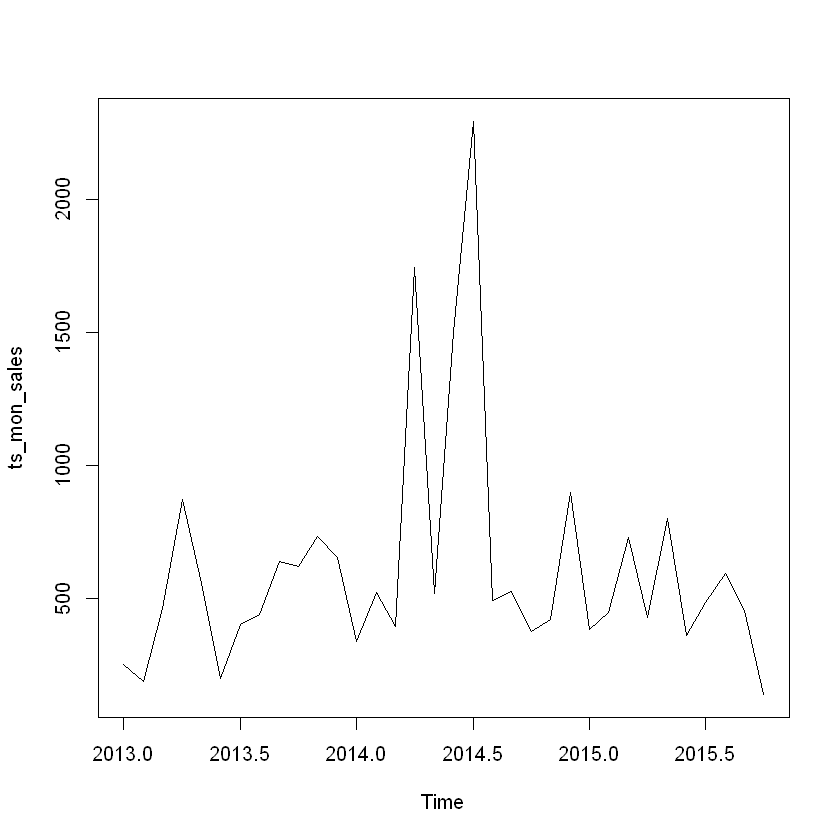

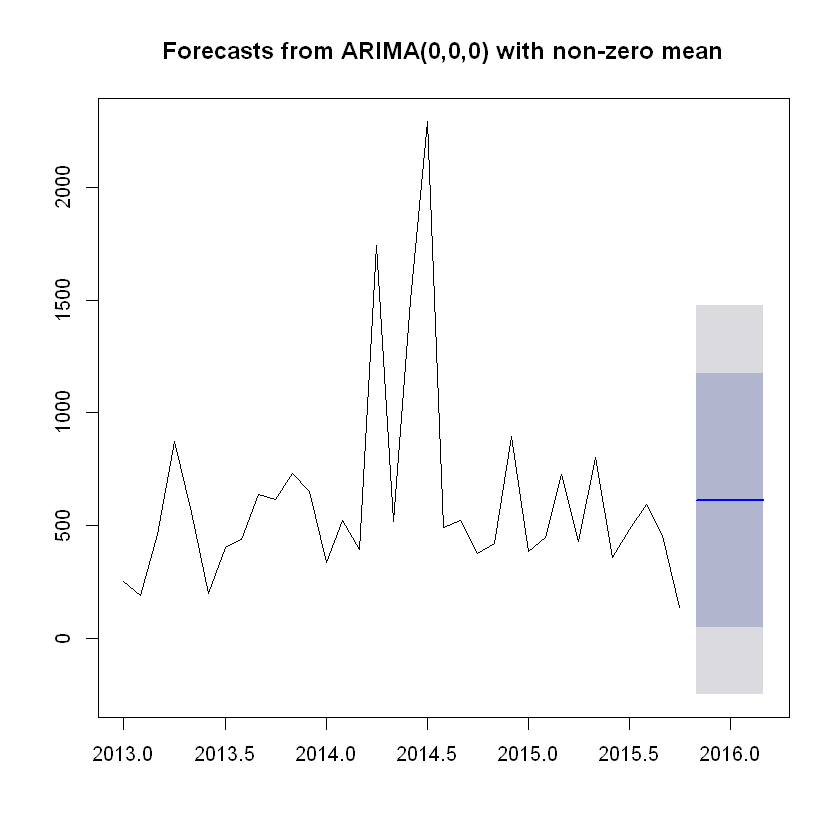

In [17]:
# Plot time series of monthly sales data by shop ID
plot(ts_mon_sales)
# I am using auto. arima function to create and model and predict / forcast sales.
ts_mon_sales_model<- auto.arima(ts_mon_sales)
ts_mon_sales_model
# predict  sales for next 5 months 
predict_sales<- predict(ts_mon_sales_model ,n.ahead = 5, se.fit=T)
#View next 5 months sales 
predict_sales
forecast_sales<- forecast(object=ts_mon_sales_model, h=5)
forecast_sales
plot(forecast_sales)

1. Here the forecasts for Nov 2015 to Mar 2016 are plotted as a blue line, 
2. 80% prediction interval is displayed with Blue Haze (Violet) shaded area, and 
3. 95% prediction interval is displayed with Bombay (Grey) shaded area.



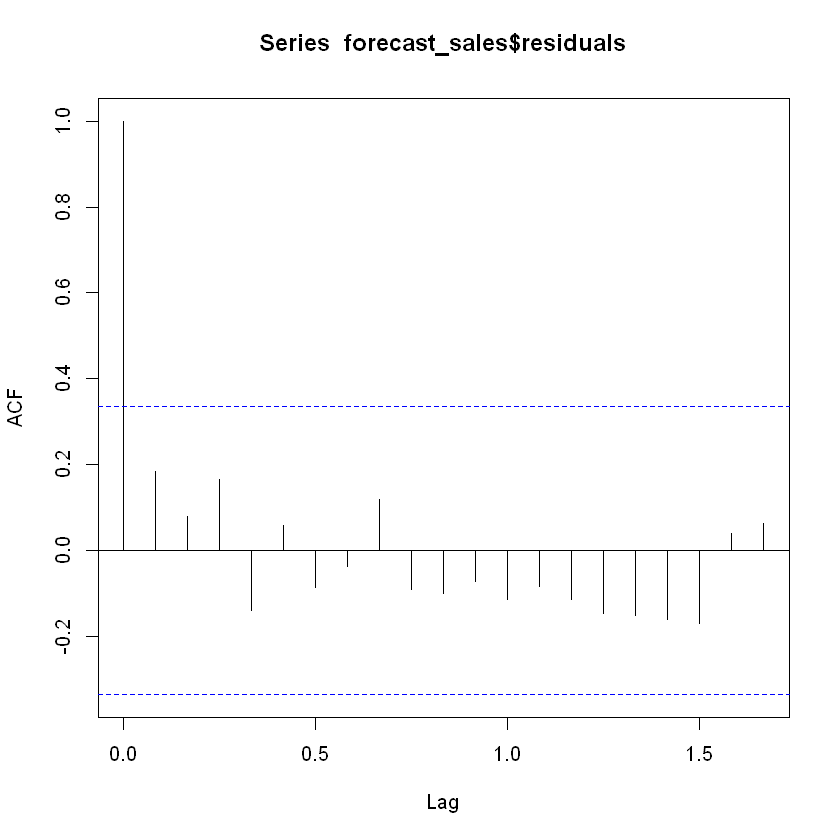

In [18]:
# Auto- and Cross- Covariance and -Correlation Function Estimation 
acf(forecast_sales$residuals, lag.max=20)

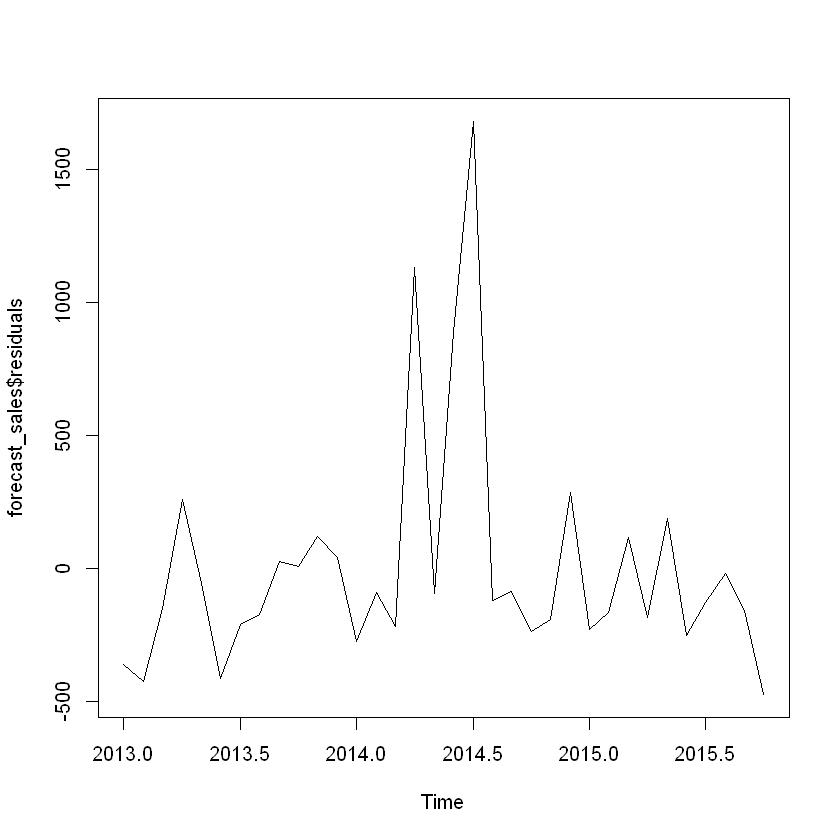

In [19]:
# plot forecast_sales residuals plot
plot.ts(forecast_sales$residuals)

In [20]:
# Derive monthly sales by ID(Shop_ID, item_ID tuple )

shop_item_tuple_mon_sales<- train_sales_model_data%>% group_by(ID, date_month)%>% summarise(items_sold = sum(item_cnt_day), total_sales = sum(item_price*item_cnt_day))%>% ungroup()%>% arrange(desc(items_sold))


In [21]:
# to predict sales we need to convert items solda data from shop_item_tuple_mon_sales data set into time series. I am using ts function to convert items_sold into time series data.
# additional parameters passed to ts function are as follows.
# time duration to be considered for time series object will be between start and end time frame provided 
# time range provided is from Jan 2013 to Oct 2015 and frequency =12 is to determine the interval and here the interval is monthly.
ts_shop_item_mon_sales<- ts(shop_item_tuple_mon_sales$items_sold, start =c(2013,1), end =c(2015,10), frequency= 12)


Series: ts_shop_item_mon_sales 
ARIMA(0,2,0) 

sigma^2 estimated as 23481:  log likelihood=-206.43
AIC=414.86   AICc=414.99   BIC=416.32

$pred
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2015                                         620 613
2016 606 599 592                                    

$se
           Jan       Feb       Mar Apr May Jun Jul Aug Sep Oct       Nov
2015                                                            153.2356
2016  573.3550  839.3058 1136.4254                                      
           Dec
2015  342.6451
2016          


         Point Forecast     Lo 80     Hi 80       Lo 95     Hi 95
Nov 2015            620  423.6207  816.3793   319.66381  920.3362
Dec 2015            613  173.8826 1052.1174   -58.57215 1284.5721
Jan 2016            606 -128.7840 1340.7840  -517.75514 1729.7551
Feb 2016            599 -476.6136 1674.6136 -1046.00909 2244.0091
Mar 2016            592 -864.3877 2048.3877 -1635.35283 2819.3528

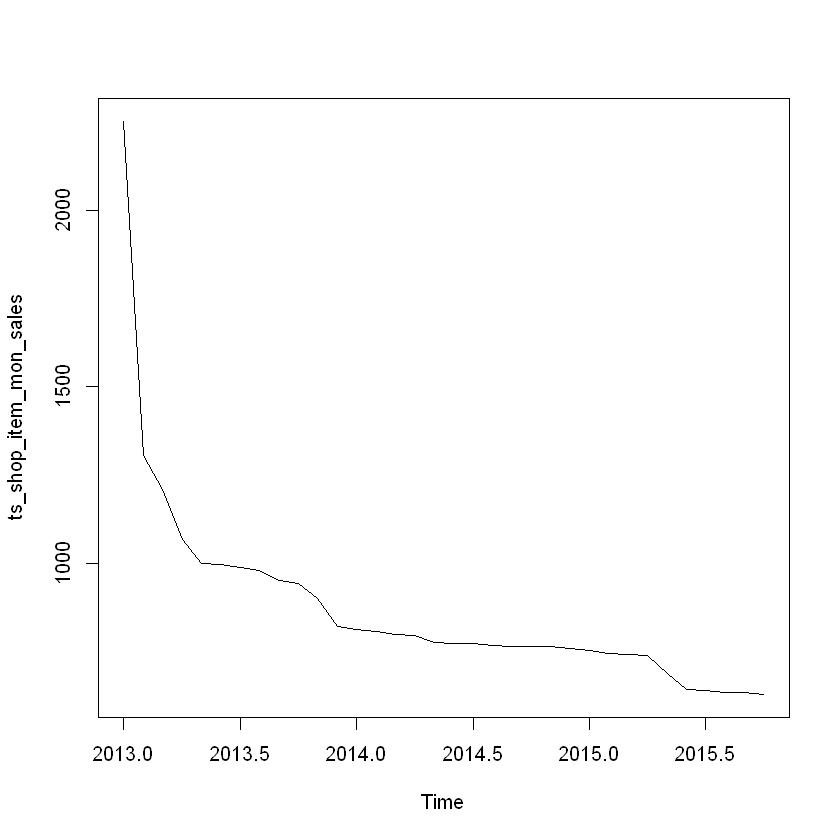

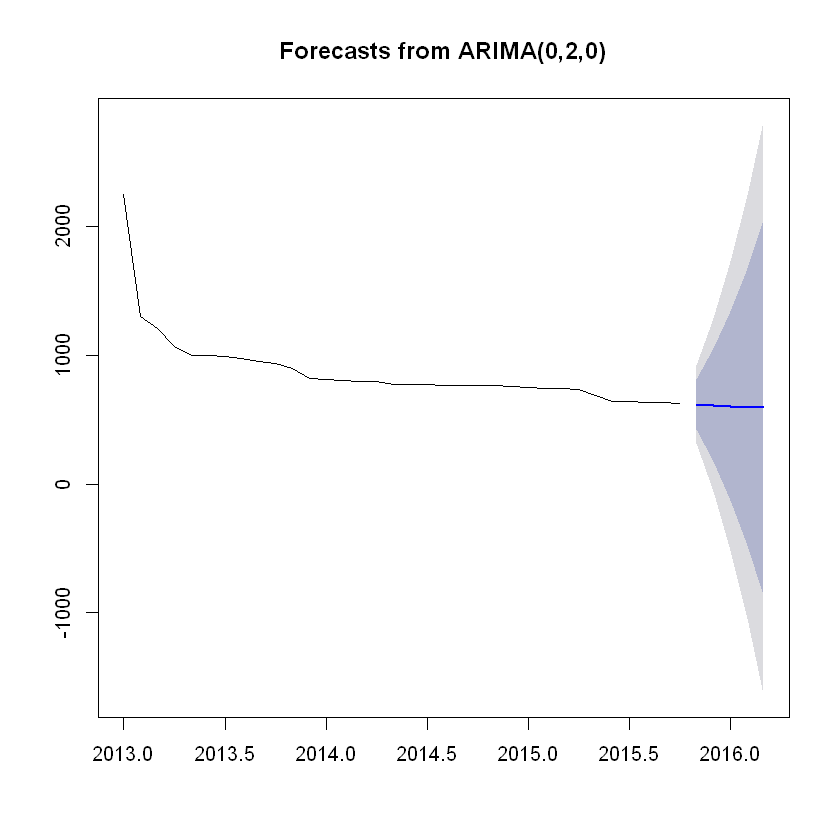

In [22]:
# Plot time series of monthly sales data by ID(Shop_ID and Item_ID )
plot(ts_shop_item_mon_sales)
# I am using auto. arima function to create and model and predict / forcast sales.
ts_shop_item_mon_sales_model<- auto.arima(ts_shop_item_mon_sales)
ts_shop_item_mon_sales_model
# predict  sales for next 5 months 
predict_ID_sales<- predict(ts_shop_item_mon_sales_model ,n.ahead = 5, se.fit=T)
#View next 5 months sales 
predict_ID_sales
forecast_ID_sales<- forecast(object=ts_shop_item_mon_sales_model, h=5)
forecast_ID_sales
plot(forecast_ID_sales)

In [23]:
    Here the forecasts for Nov 2015 to Mar 2016 are plotted as a blue line,
    80% prediction interval is displayed with Blue Haze (Violet) shaded area, and
    95% prediction interval is displayed with Bombay (Grey) shaded area.



ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1:     Here the
             ^
